In [1]:
import mne
from BCI2kReader import BCI2kReader as b2k
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 

In [95]:
filename = "./dataset/normal/Dhelal_Normal_15_6_2011S001R01.dat"
indices = np.empty(0)
with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:500]
        #my_signals= test.signals
        

In [96]:
raw = pd.DataFrame(my_signals)
raw = pd.DataFrame.transpose(raw)

In [97]:
raw.index

RangeIndex(start=0, stop=400, step=1)

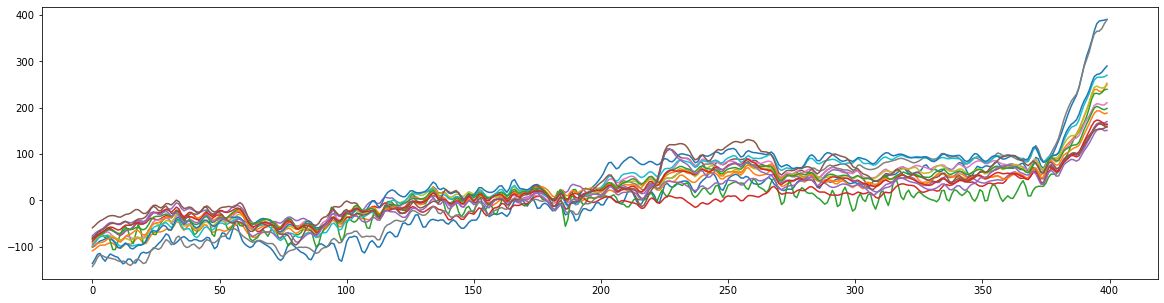

In [98]:
plt.figure(figsize = (20,5))
plt.plot(raw)

In [99]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [100]:
def data_extraction(raw):
    mean_dataframe = []
    std_dataframe = []
    snr_dataframe = []
    labels = [1, 1, 1]
    for i in range(16):
        mean = raw.values[i].mean() #mean setiap channel (channel = index array)
        mean_dataframe.append(mean)

        std = raw.values[i].std()
        std_dataframe.append(std)

        snr = signaltonoise(raw.values[i])
        snr_dataframe.append(snr)

        fixed_data = list(zip(mean_dataframe, std_dataframe, snr_dataframe))
    
    
    fixed_data.append(labels)
    
    final_dataframe = pd.DataFrame(fixed_data,
                  index= ['FP1', 'F3', 'F7', 'T3', 'T5', 'O1', 'C4', 'FP2', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Pz', 'Oz', 'O2', 'label'])

    final_dataframe = pd.DataFrame.transpose(final_dataframe)
    return final_dataframe

In [101]:
#problem : bagaimana cara otomatis untuk menghitung featur statisik (mean, standar deviasi, SNR)
#-- pada setuap channel (channel = index dataframe)
#-- mem-merge semua fitur jadi satu sebanyak 16 fitur (1 channel mempunyai 3 fitur statistik)

In [102]:
datafixed = data_extraction(raw)

In [103]:
datafixed.head()

,FP1,F3,F7,T3,T5,O1,C4,FP2,Fz,F4,F8,C3,Cz,Pz,Oz,O2,label
0,-95.169937,-90.083817,-83.657059,-79.761002,-79.41037,-77.80162,-74.377876,-74.196373,-77.288055,-80.152878,-82.433998,-82.941376,-79.529999,-75.627747,-76.184631,-78.88031,1.0
1,20.360943,19.394978,18.040709,18.017525,20.265905,22.782488,22.97744,23.126715,24.653933,24.893517,24.539625,25.897579,27.73313,28.265808,27.854801,28.564066,1.0
2,-4.674141883850098,-4.644698143005371,-4.637126922607422,-4.426856994628906,-3.918421983718872,-3.4149746894836426,-3.2369956970214844,-3.208253860473633,-3.134917974472046,-3.219829559326172,-3.359220027923584,-3.202669143676758,-2.867689371109009,-2.675591230392456,-2.735062837600708,-2.7615225315093994,1


In [104]:
datafixed.index[1]

1

In [105]:
datafixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FP1     3 non-null      object
 1   F3      3 non-null      object
 2   F7      3 non-null      object
 3   T3      3 non-null      object
 4   T5      3 non-null      object
 5   O1      3 non-null      object
 6   C4      3 non-null      object
 7   FP2     3 non-null      object
 8   Fz      3 non-null      object
 9   F4      3 non-null      object
 10  F8      3 non-null      object
 11  C3      3 non-null      object
 12  Cz      3 non-null      object
 13  Pz      3 non-null      object
 14  Oz      3 non-null      object
 15  O2      3 non-null      object
 16  label   3 non-null      object
dtypes: object(17)
memory usage: 536.0+ bytes


In [106]:
datafixed.values[1]

array([20.360942840576172, 19.394977569580078, 18.040708541870117,
       18.01752471923828, 20.265905380249023, 22.782487869262695,
       22.977439880371094, 23.1267147064209, 24.653932571411133,
       24.893516540527344, 24.53962516784668, 25.897579193115234,
       27.733129501342773, 28.26580810546875, 27.854801177978516,
       28.56406593322754, 1.0], dtype=object)

In [107]:
def data_extraction_all(raw):
    combine_dataframe = []
    labels = 1
    for i in range(16):
        mean = raw.values[i].mean() #mean setiap channel (channel = index array)
        combine_dataframe.append(mean)

        std = raw.values[i].std()
        combine_dataframe.append(std)

        snr = signaltonoise(raw.values[i])
        combine_dataframe.append(snr)
    combine_dataframe.append(labels)
    final_dataframe = pd.DataFrame(combine_dataframe, index = ['FP1_mean', 'FP1_std', 'FP1_snr', 'F3_mean', 'F3_std', 'F3_snr', 'F7_mean', 'F7_std', 'F7_snr', 'T3_mean', 'T3_std', 'T3_snr','T5_mean', 'T5_std', 'T5_snr','O1_mean', 'O1_std', 'O1_snr','C4_mean', 'C4_std', 'C4_snr','FP2_mean', 'FP2_std', 'FP2_snr','Fz_mean', 'Fz_std', 'Fz_snr','F4_mean', 'F4_std', 'F4_snr','F8_mean', 'F8_std', 'F8_snr','C3_mean', 'C3_std', 'C3_snr','Cz_mean', 'Cz_std', 'Cz_snr','Pz_mean', 'Pz_std', 'Pz_snr','Oz_mean', 'Oz_std', 'Oz_snr','O2_mean', 'O2_std', 'O2_snr','label'])
    final_dataframe = pd.DataFrame.transpose(final_dataframe)
    return final_dataframe

In [108]:
datafixed2 = data_extraction_all(raw)

In [109]:
datafixed2.head(49)

,FP1_mean,FP1_std,FP1_snr,F3_mean,F3_std,F3_snr,F7_mean,F7_std,F7_snr,T3_mean,...,Pz_mean,Pz_std,Pz_snr,Oz_mean,Oz_std,Oz_snr,O2_mean,O2_std,O2_snr,label
0,-95.169937,20.360943,-4.674141883850098,-90.083817,19.394978,-4.644698143005371,-83.657059,18.040709,-4.637126922607422,-79.761002,...,-75.627747,28.265808,-2.675591230392456,-76.184631,27.854801,-2.735062837600708,-78.88031,28.564066,-2.7615225315093994,1


In [110]:
datafixed2 = pd.DataFrame.transpose(datafixed2)

In [111]:
datafixed2.head()

,0
FP1_mean,-95.169937
FP1_std,20.360943
FP1_snr,-4.674141883850098
F3_mean,-90.083817
F3_std,19.394978


In [112]:
# f = abs(np.fft.fft(raw.values))
# num = np.size(raw)
# freq = [i/num for i in raw.index]

# spectrum=f.real*f.real+f.imag*f.imag
# nspectrum = spectrum/spectrum[0]
# plt.figure(figsize = (20,5))
# plt.plot(freq,nspectrum)

In [113]:
# combine_fourier_data = list(zip(nspectrum, freq))
# fourier_dataframe = pd.DataFrame(combine_fourier_data, columns = ['nSpectrum', 'Frequencies'])
# #fourier_dataframe = pd.DataFrame.transpose(fourier_dataframe)
# #fourier_dataframe = pd.DataFrame(combine_fourier_data)

In [114]:
# fourier_dataframe.head(16)